In [50]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive

In [51]:
#mounting drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
#naming data directory from drive
data_dir = '/content/drive/My Drive/SAC10491/'

In [53]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/SAC10491/dairy_dataset.csv') #load dataset from our drive

pd.set_option('display.max_columns', None)  # This will display all columns
df #display our dataset

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,18377.0200,30,Refrigerated,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,21835.5072,72,Frozen,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,12390.5145,11,Refrigerated,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,49080.9050,5,Refrigerated,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,45294.5655,23,Refrigerated,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,54043.4916,7,Refrigerated,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,47.4300,7,Refrigerated,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


In [54]:
#to check basic information of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [55]:
df.describe() #statistical information of numerical features

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


In [56]:
df.describe(include='object') #statistical information of categorical features


,Location,Farm Size,Date,Product Name,Brand,Storage Condition,Production Date,Expiration Date,Customer Location,Sales Channel
count,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325
unique,15,3,1278,10,11,5,1405,1441,15,3
top,Delhi,Large,2021-01-28,Curd,Amul,Refrigerated,2022-01-13,2019-07-27,Delhi,Retail
freq,525,1462,11,479,1053,2459,9,9,499,1478


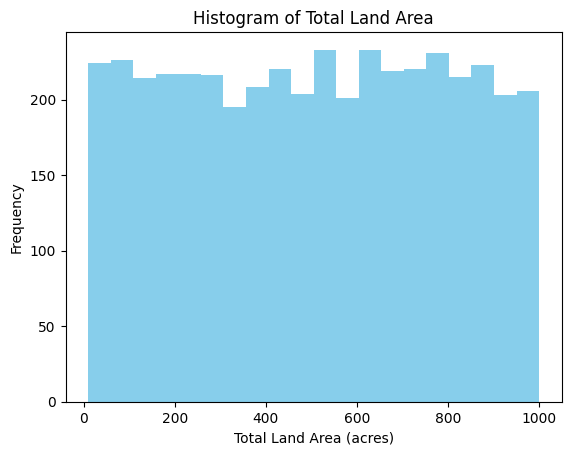

In [57]:
import matplotlib.pyplot as plt

# Example for Total Land Area
plt.hist(df['Total Land Area (acres)'], bins=20, color='skyblue')
plt.xlabel('Total Land Area (acres)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Land Area')
plt.show()


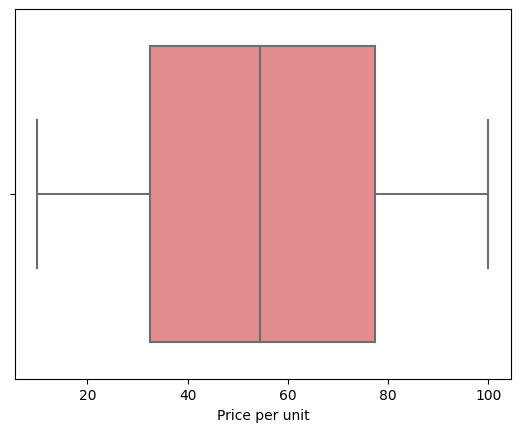

In [58]:
import seaborn as sns

# Example for Number of Cows
sns.boxplot(x=df['Price per Unit'], color='lightcoral')
plt.xlabel('Price per unit')
plt.show()


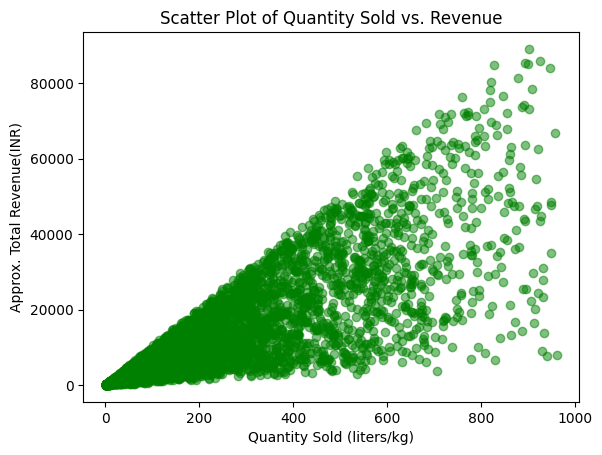

In [59]:
# Example for Scatter Plot
plt.scatter(df['Quantity Sold (liters/kg)'], df['Approx. Total Revenue(INR)'], alpha=0.5, color='green')
plt.xlabel('Quantity Sold (liters/kg)')
plt.ylabel('Approx. Total Revenue(INR)')
plt.title('Scatter Plot of Quantity Sold vs. Revenue')
plt.show()


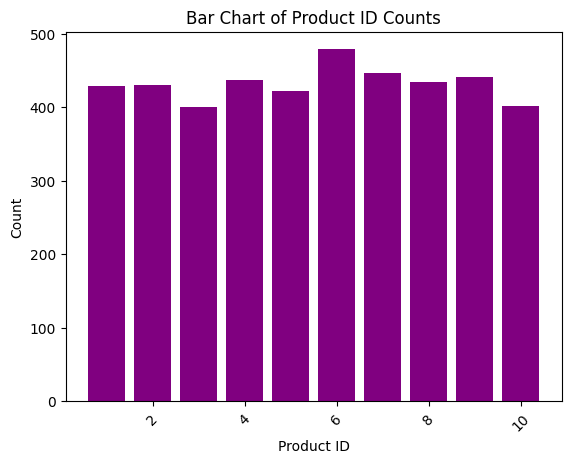

In [60]:
# Example for Bar Chart of Product ID
product_counts = df['Product ID'].value_counts()
plt.bar(product_counts.index, product_counts.values, color='purple')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Bar Chart of Product ID Counts')
plt.xticks(rotation=45)

plt.show()


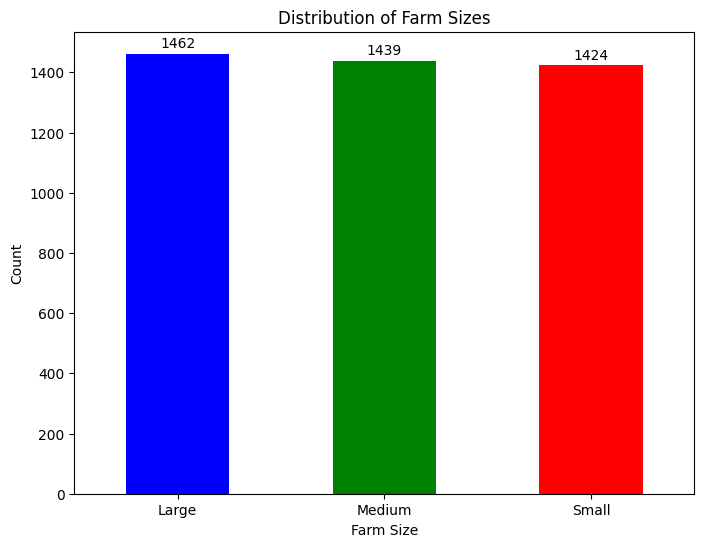

In [61]:
# Filter and count farm sizes
farm_size_counts = df['Farm Size'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
farm_size_counts.plot(kind='bar', color=['blue', 'green', 'red'])  # Assign colors to 'Large', 'Medium', and 'Small'
plt.title('Distribution of Farm Sizes')
plt.xlabel('Farm Size')
plt.xticks(rotation=None)
plt.ylabel('Count')

# Annotate the plot with the count of each farm size
for i, count in enumerate(farm_size_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()

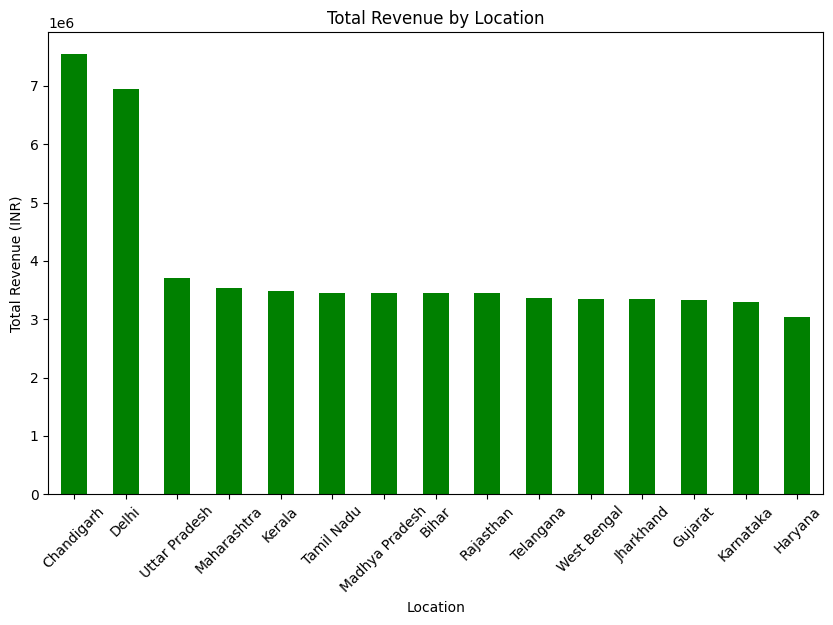

In [62]:
# 3. Calculate and visualize the total revenue per location
total_revenue_by_location = df.groupby('Location')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
total_revenue_by_location.plot(kind='bar', color='green')
plt.title('Total Revenue by Location')
plt.xlabel('Location')
plt.ylabel('Total Revenue (INR)')
plt.xticks(rotation=45)
plt.show()

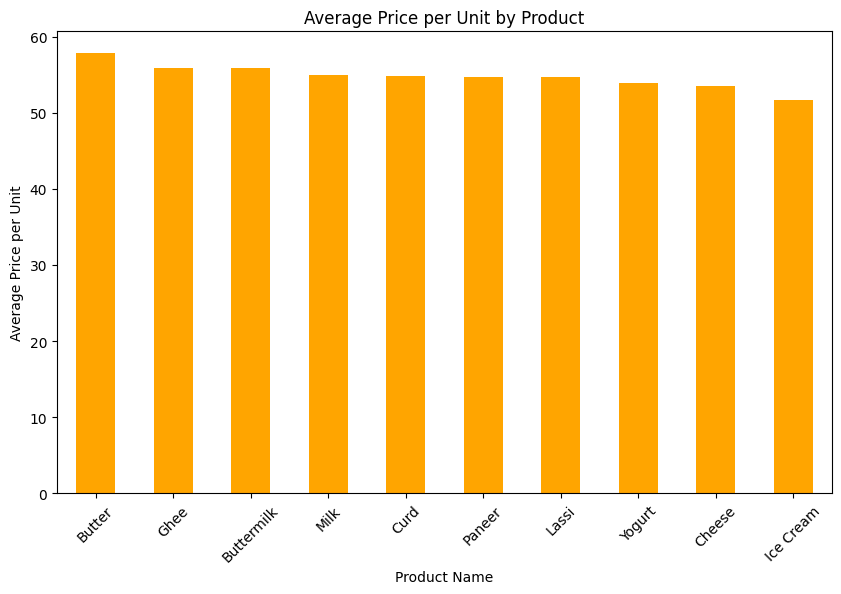

In [63]:
# 4. Calculate and visualize the average price per unit by product name
avg_price_by_product = df.groupby('Product Name')['Price per Unit'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_price_by_product.plot(kind='bar', color='orange')
plt.title('Average Price per Unit by Product')
plt.xlabel('Product Name')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.show()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


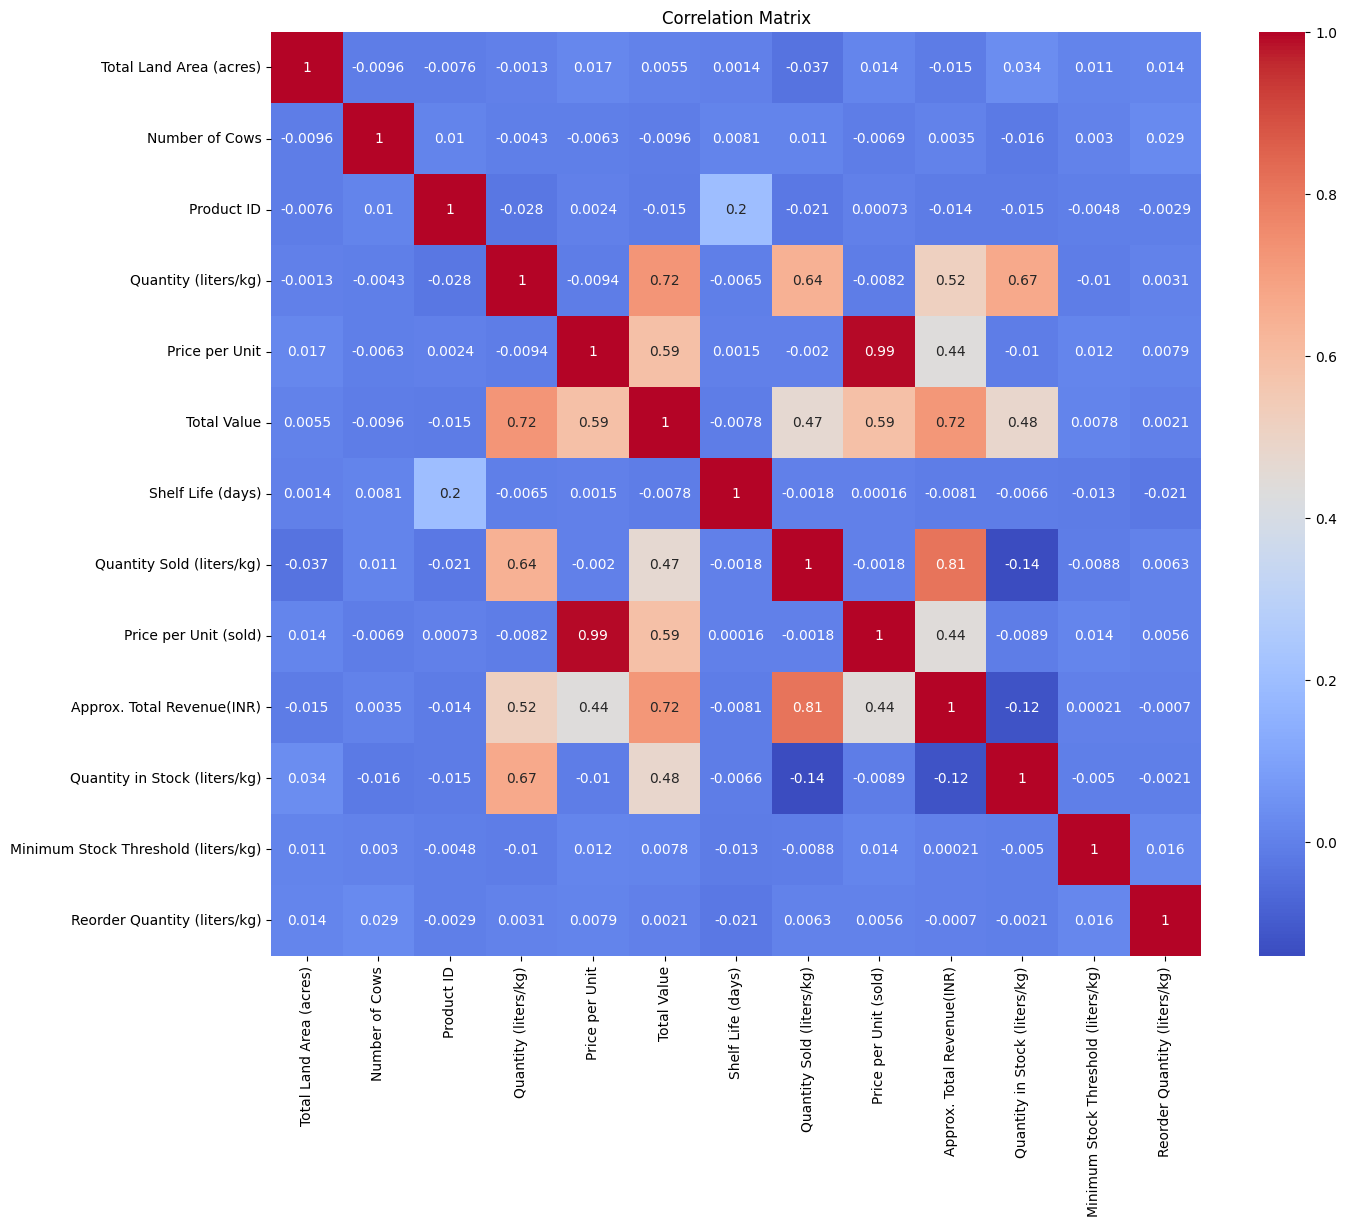

In [64]:
# Correlation matrix
plt.figure(figsize=(15,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

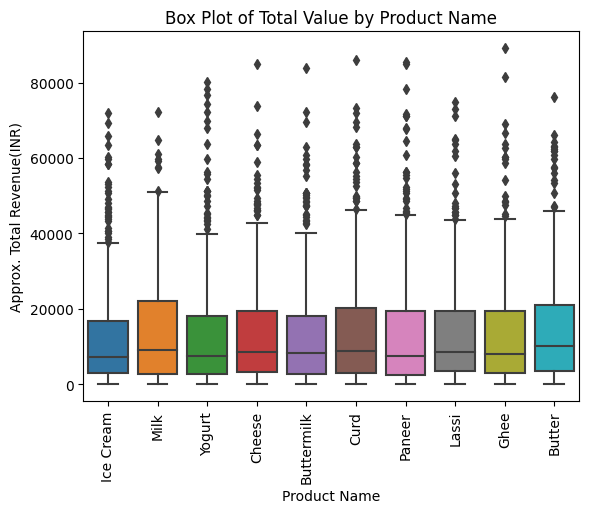

In [65]:
import seaborn as sns
sns.boxplot(data=df, x='Product Name', y='Approx. Total Revenue(INR)')
plt.title('Box Plot of Total Value by Product Name')
plt.xticks(rotation=90)
plt.show()

In [66]:
categorical_cols = ['Location', 'Farm Size', 'Product Name', 'Brand', 'Customer Location', 'Sales Channel']
numerical_cols = ['Total Land Area (acres)', 'Number of Cows', 'Quantity (liters/kg)', 'Price per Unit',
                  'Total Value', 'Shelf Life (days)',
                  'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
                  'Reorder Quantity (liters/kg)']

In [67]:
from scipy.stats import zscore
# Import necessary libraries for model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
!pip install shap

# Filter the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
import shap

In [68]:
categorical_features = ['Location', 'Product Name', 'Brand', 'Storage Condition', 'Customer Location', 'Sales Channel']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

In [69]:
cat_preprocessor = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
num_preprocessor = Pipeline([
    ('scaler', StandardScaler())
])

In [70]:
preprocessor = ColumnTransformer([
    ('cat', cat_preprocessor, categorical_cols),
    ('num', num_preprocessor, numerical_cols)
])

In [71]:
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [72]:
from scipy.stats import zscore
z_scores = zscore(df['Approx. Total Revenue(INR)'])
df_no_outliers = df[(z_scores < 3)]

In [73]:
df.shape

(4325, 23)

In [74]:
df_no_outliers.shape

(4237, 23)

In [75]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4237 non-null   object 
 1   Total Land Area (acres)              4237 non-null   float64
 2   Number of Cows                       4237 non-null   int64  
 3   Farm Size                            4237 non-null   object 
 4   Date                                 4237 non-null   object 
 5   Product ID                           4237 non-null   int64  
 6   Product Name                         4237 non-null   object 
 7   Brand                                4237 non-null   object 
 8   Quantity (liters/kg)                 4237 non-null   float64
 9   Price per Unit                       4237 non-null   float64
 10  Total Value                          4237 non-null   float64
 11  Shelf Life (days)             

In [76]:
df.dtypes

Location                                object
Total Land Area (acres)                float64
Number of Cows                           int64
Farm Size                               object
Date                                    object
Product ID                               int64
Product Name                            object
Brand                                   object
Quantity (liters/kg)                   float64
Price per Unit                         float64
Total Value                            float64
Shelf Life (days)                        int64
Storage Condition                       object
Production Date                         object
Expiration Date                         object
Quantity Sold (liters/kg)                int64
Price per Unit (sold)                  float64
Approx. Total Revenue(INR)             float64
Customer Location                       object
Sales Channel                           object
Quantity in Stock (liters/kg)            int64
Minimum Stock

In [77]:
df['Date'] = pd.to_datetime(df['Date'])
df['Production Date'] = pd.to_datetime(df['Production Date'])
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'])

In [78]:
df.dtypes

Location                                       object
Total Land Area (acres)                       float64
Number of Cows                                  int64
Farm Size                                      object
Date                                   datetime64[ns]
Product ID                                      int64
Product Name                                   object
Brand                                          object
Quantity (liters/kg)                          float64
Price per Unit                                float64
Total Value                                   float64
Shelf Life (days)                               int64
Storage Condition                              object
Production Date                        datetime64[ns]
Expiration Date                        datetime64[ns]
Quantity Sold (liters/kg)                       int64
Price per Unit (sold)                         float64
Approx. Total Revenue(INR)                    float64
Customer Location           

In [79]:
df.drop(['Product ID','Date','Production Date','Expiration Date'],axis=1,inplace=True)


In [80]:
df['Product Name'].nunique()

10

In [81]:
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,Yogurt,Dodla Dairy,503.48,36.50,18377.0200,30,Refrigerated,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,Cheese,Britannia Industries,823.36,26.52,21835.5072,72,Frozen,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,Buttermilk,Mother Dairy,147.77,83.85,12390.5145,11,Refrigerated,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,Curd,Mother Dairy,554.90,88.45,49080.9050,5,Refrigerated,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,Yogurt,Palle2patnam,818.33,55.35,45294.5655,23,Refrigerated,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,Curd,Mother Dairy,583.56,92.61,54043.4916,7,Refrigerated,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,Curd,Raj,3.10,15.30,47.4300,7,Refrigerated,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


In [82]:
# Define features and target variable
features = df.drop(columns=['Approx. Total Revenue(INR)'])  # Features (excluding the target variable)
target = df['Approx. Total Revenue(INR)']  # Target variable

# Split the data into training (70%), testing (15%), and validation (15%) sets
# Random_state is set for reproducibility, you can change it or omit it
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (3027, 18)
Testing set shape: (649, 18)
Validation set shape: (649, 18)


In [84]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
X_val_preprocessed = preprocessor.transform(X_val)

In [85]:
scaler = StandardScaler()
y_train_normalized = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler.transform(y_test.values.reshape(-1, 1))
y_val_normalized = scaler.transform(y_val.values.reshape(-1,1))

In [86]:
X_train_preprocessed

<3027x66 sparse matrix of type '<class 'numpy.float64'>'
	with 45405 stored elements in Compressed Sparse Row format>

In [87]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report


In [89]:
# Train an Isolation Forest model for anomaly detection
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_train_preprocessed)


IsolationForest(contamination=0.05, random_state=42)

In [96]:
true_labels = df.iloc[X_test.index]['Number of Cows']  # Replace 'Anomaly_Labels' with your ground truth labels

# Evaluate the model's performance

In [91]:
# Predict anomalies on the test set
y_pred = model.predict(X_test_preprocessed)

In [92]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       6.0
          11       0.00      0.00      0.00       4.0
          12       0.00      0.00      0.00       7.0
          13       0.00      0.00      0.00       9.0
          14       0.00      0.00      0.00       4.0
          15       0.00      0.00      0.00       7.0
          16       0.00      0.00      0.00       7.0
          17       0.00      0.00      0.00       3.0
          18       0.00      0.00      0.00       4.0
          19       0.00      0.00      0.00      10.0
          20       0.00      0.00      0.00       7.0
          21       0.00      0.00      0.00       6.0
          22       0.00      0.00      0.00       7.0
          23       0.00      0.00      0.00       5.0
          24       0.00      0.00      0.00       9.0
   

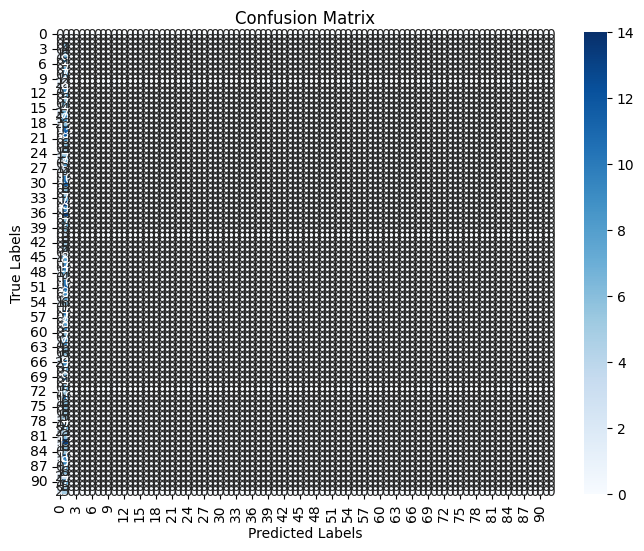

In [97]:

# Evaluate the model's performance
classification_report_result = classification_report(true_labels, y_pred)
confusion_matrix_result = confusion_matrix(true_labels, y_pred)

print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

# Plot a heatmap of the confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

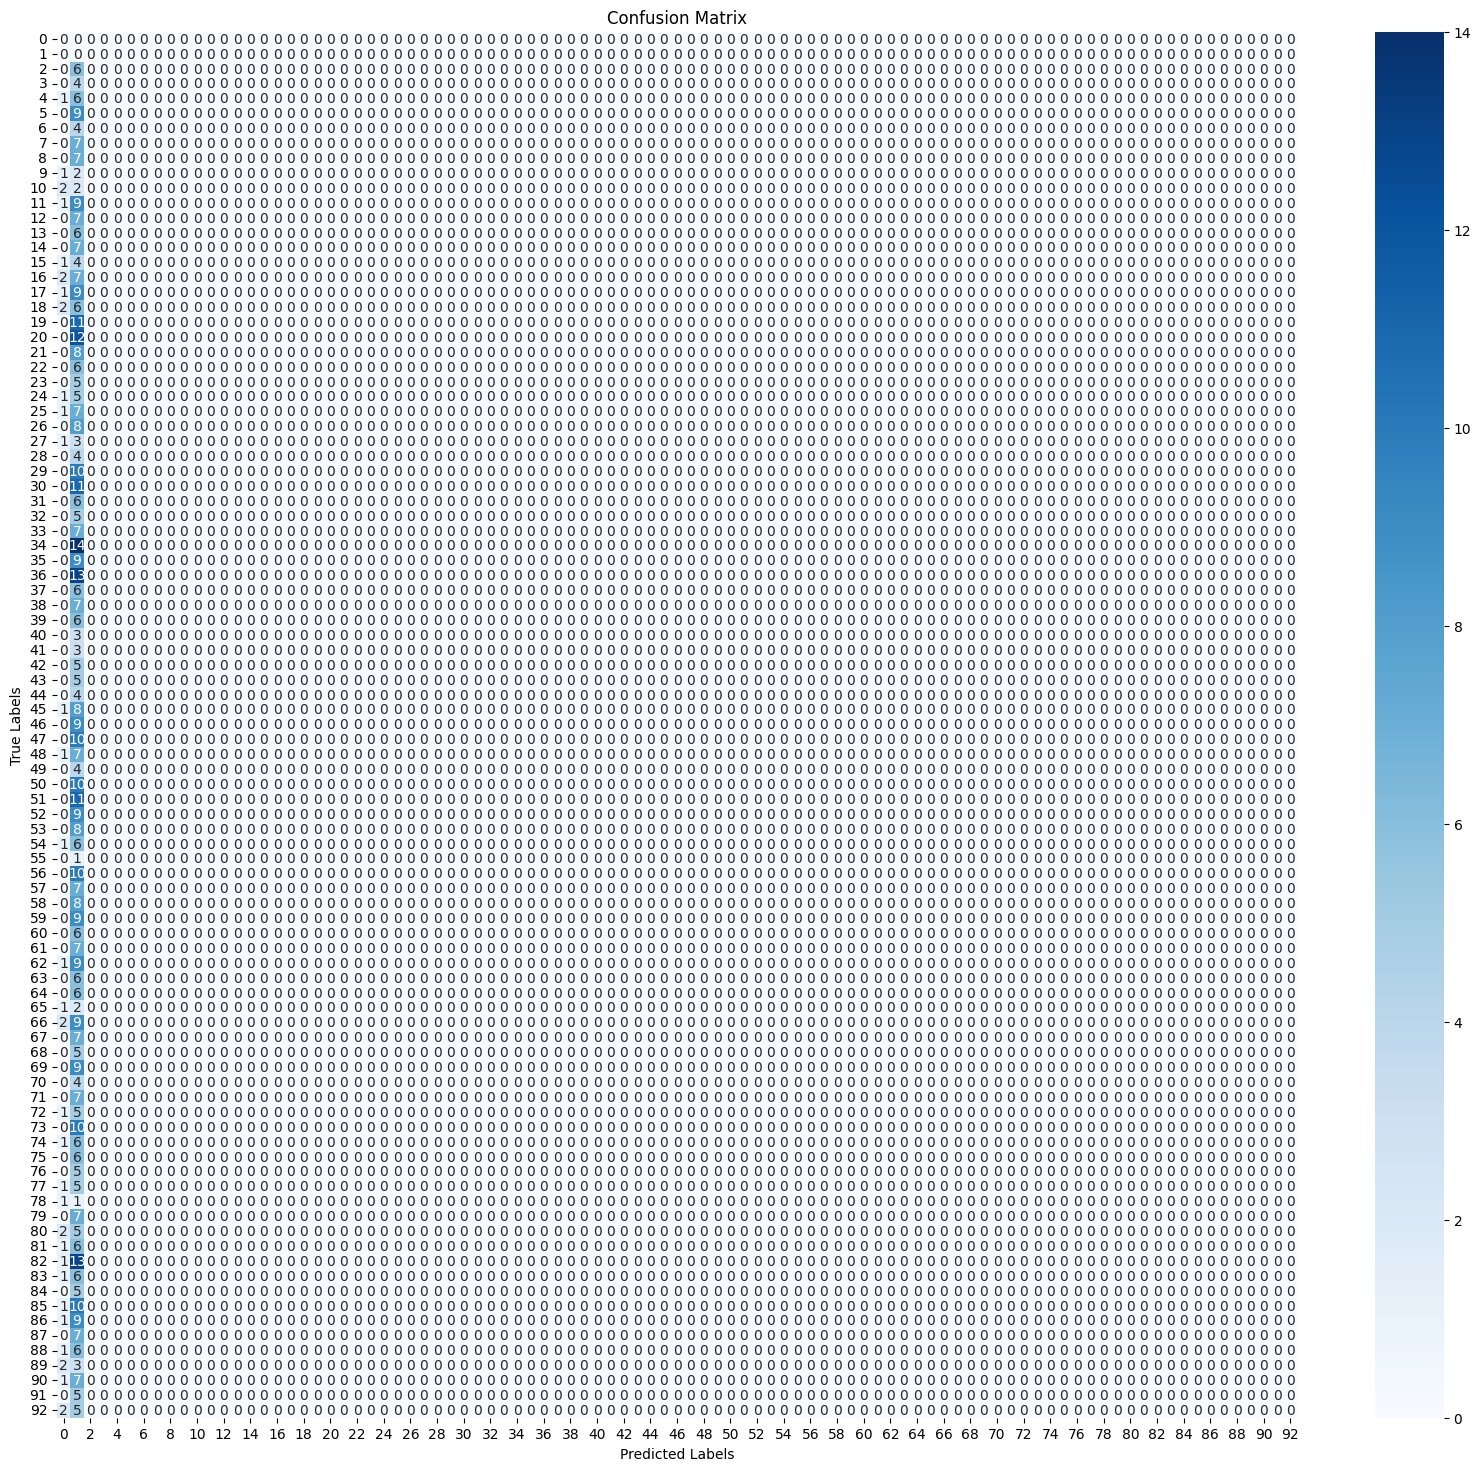

In [98]:
# Plot a heatmap of the confusion matrix for visualization
plt.figure(figsize=(20, 18))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [99]:
import random

# Define a class to represent an IoT device
class IoTDevice:
    def __init__(self, device_id):
        self.device_id = device_id
        self.trust_score = 0.5  # Initial trust score (between 0 and 1)

    def update_trust_score(self, behavior_score):
        # Update the trust score based on the device's behavior
        self.trust_score = (self.trust_score + behavior_score) / 2

    def is_suspicious(self, threshold=0.4):
        # Check if the device is suspicious based on the trust score
        return self.trust_score < threshold

# Simulate a list of IoT devices
num_devices = 10
devices = [IoTDevice(device_id) for device_id in range(num_devices)]

# Simulate behavior and update trust scores
for _ in range(100):
    # Randomly select a device and simulate its behavior score
    device = random.choice(devices)
    behavior_score = random.uniform(0.0, 1.0)

    # Update the device's trust score based on behavior
    device.update_trust_score(behavior_score)

# Detect and isolate suspicious devices
suspicious_devices = [device for device in devices if device.is_suspicious()]
trusted_devices = [device for device in devices if not device.is_suspicious()]

print("Suspicious Devices:")
for device in suspicious_devices:
    print(f"Device ID: {device.device_id}, Trust Score: {device.trust_score}")

print("\nTrusted Devices:")
for device in trusted_devices:
    print(f"Device ID: {device.device_id}, Trust Score: {device.trust_score}")


Suspicious Devices:
Device ID: 0, Trust Score: 0.25407036011450745
Device ID: 3, Trust Score: 0.275870166041987
Device ID: 5, Trust Score: 0.3865676793330747
Device ID: 8, Trust Score: 0.3014105577295112
Device ID: 9, Trust Score: 0.36442804093512526

Trusted Devices:
Device ID: 1, Trust Score: 0.574914237064548
Device ID: 2, Trust Score: 0.5290447005958544
Device ID: 4, Trust Score: 0.8779225117129932
Device ID: 6, Trust Score: 0.45711766165930134
Device ID: 7, Trust Score: 0.4750062410260109


In [100]:
import socket
import json
from cryptography.fernet import Fernet

# Generate a secret key for encryption (in a real scenario, securely distribute the key)
secret_key = Fernet.generate_key()
cipher_suite = Fernet(secret_key)

# Create a socket to connect to the cloud server
server_address = ('cloud_server_ip', 12345)  # Replace with the cloud server's IP and port
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
client_socket.connect(server_address)

# Sample data to be transmitted
data = {
    "sensor_id": 1,
    "temperature": 25.5,
    "humidity": 60.2
}

# Serialize and encrypt the data
data_json = json.dumps(data)
encrypted_data = cipher_suite.encrypt(data_json.encode())

# Send the encrypted data to the cloud server
client_socket.send(encrypted_data)

# Close the socket
client_socket.close()


gaierror: ignored